## 1. Numerical differentiation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as scm

In [3]:
def function1(x):
    return 1 + 0.5*np.tanh(2*x)

In [4]:
# Derivada de una función en un punto 

def derivf(Method, f, x, h = 0.01):
    if Method == 'backward':
        return (f(x) - f(x-h))/h
    elif Method == 'forward':
        return (f(x+h) - f(x))/h
    elif Method == 'central':
        return (f(x+h/2) - f(x-h/2))/h
    else:
        print("Ingrese un método válido")

In [5]:
# Derivada de una función en un intervalo

def DER_FUNCTION(f, array, dx = 0.01):
    df = np.empty_like(array)
    
    df[0] = derivf('forward', f, array[0], dx)
    df[-1] = derivf('backward', f, array[-1], dx)
    
    for i in range(1,len(array)-1):
        df[i] = derivf('central', f, array[i], dx)
    
    return df

In [6]:
def analytic_deriv(x):
    return 1/(np.cosh(2*x))**2

In [7]:
x = np.linspace(-2,2,100)
dx = 1e-6
df_num = DER_FUNCTION(function1, x, dx)
df_ana = analytic_deriv(x)

# df_num[0] = deriv('forward', function1, x[0], dx)
# df_num[-1] = deriv('backward', function1, x[-1], dx)

# for i in range(1,len(x)-1):
#     df_num[i] = deriv('central', function1, x[i], dx)

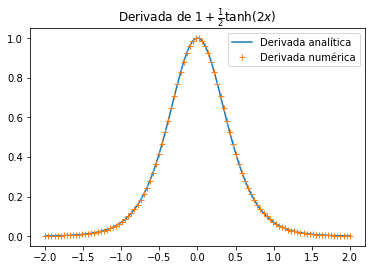

In [8]:
plt.plot(x, df_ana, label = 'Derivada analítica')
plt.plot(x, df_num, '+', label = 'Derivada numérica')
plt.legend()
plt.title(r'Derivada de $1 + \frac{1}{2} \tanh (2x)$')
plt.show()

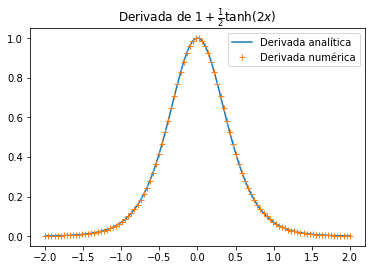

In [9]:
plt.plot(x, df_ana, label = 'Derivada analítica')
plt.plot(x, [scm.derivative(function1, ξ, dx=dx) for ξ in x], '+', label = 'Derivada numérica')
plt.legend()
plt.title(r'Derivada de $1 + \frac{1}{2} \tanh (2x)$')
plt.show()

## 2. An alternative integration rule

In [10]:
def trapezoid(f,a,b,N,h):
    S = h*(f(a) + f(b))/2
    for k in range(1,N):
        S += h*f(a + k*h)
    return S

In [11]:
def function2(x):
    return x**4 - 2*x + 1

In [12]:
def alt_int_rule(f, a, b, N = 10, hd = 1e-5):
    xi = np.linspace(a, b, N)
    trap = trapezoid(f, a, b, N, (b-a)/N)
    der = 1/12*hd**2*(scm.derivative(f, a, hd) - scm.derivative(f, b, hd))
    
    return trap + der

In [13]:
uwu = alt_int_rule(function2, 0, 2, 10)
uwu

4.5065599997333345

## 3. Image processing and the STM

In [18]:
# Derivada parcial en x o y

def partial_der(data, coordinate, h = 0.01):
    der_par = np.empty_like(data)
    m, n = data.shape
    
    if coordinate == 'y':
        der_par[:,0] = (data[:,1] - data[:,0])/h
        der_par[:,-1] = (data[:,-1] - data[:,-2])/h
        
        for n in range(1, n-1):
            der_par[:,n] = (data[:,n+1] - data[:,n-1])/(2*h)
        
    if coordinate == 'x':
        der_par[0,:] = (data[1,:] - data[0,:])/h
        der_par[-1,:] = (data[-1,:] - data[-2,:])/h
        
        for n in range(1, m-1):
            der_par[n,:] = (data[n+1,:] - data[n-1,:])/(2*h)
        
    return der_par

In [36]:
def intensity(data, ϕ, h):
    m, n = data.shape
    derx = partial_der(data, 'x', h)
    dery = partial_der(data, 'y', h)
    I = np.empty_like(data)
    
    for i in range(m):
        for j in range(n):
            I[i,j] = (np.cos(ϕ)*derx[i,j] + np.sin(ϕ)*dery[i,j])/ \
                     np.sqrt((derx[i,j])**2 + (dery[i,j])**2 + 1)
    
    return I

In [37]:
# Datos de altitude
datos_alt = np.loadtxt("altitude.txt",float)
I_alt = intensity(datos_alt, np.pi/4, 30000)

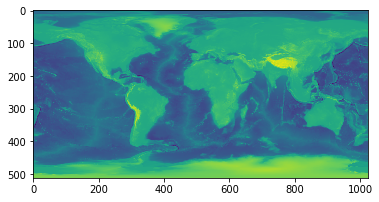

In [38]:
# Density plot de datos_alt
plt.imshow(datos_alt,cmap='viridis')
plt.show()

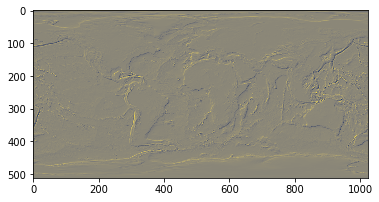

In [39]:
# Density plot de I_alt
plt.imshow(I_alt,cmap='cividis')
plt.show()

In [40]:
# Datos de stm
datos_stm = np.loadtxt("stm.txt",float)
I_stm = intensity(datos_stm, np.pi/4, 2.5)

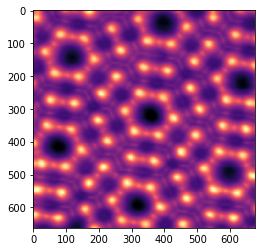

In [41]:
# Density plot de datos_alt
plt.imshow(datos_stm,cmap='magma')
plt.show()

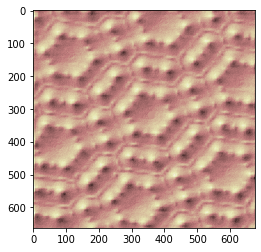

In [42]:
# Density plot de I_alt
plt.imshow(I_stm,cmap='pink')
plt.show()